In [1]:
import pandas as pd
import tweepy
import requests
import datetime
import json
import matplotlib.pyplot as plt
from Classes import Data_crawl
from functions import *
import numpy as np
import os
import sys

### My Access Keys for Tweepy

In [2]:
# sean19981002
api_key = 'AD9ZnCOeRDtYEiGe45WUtPS2j'
api_key_secret = '8YRO0UU9vAoLCOUn3FO96OXUdEBuJpRIzgyPCTHgyudmt2SZuh'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAF71jAEAAAAAKAm8%2BESJhS4ydqw1pSAd%2FXmL41Q%3DyY2fkJmdECatUXBWKk49JYzBjMFoovBtUn1VrHDiAiwQy3pwR7'

In [3]:
# s10627070
api_key = 'I3N75MY5qJxCvSrLWe0ZG4vQk'
api_key_secret = 'Q3GC8Vr6F2FNqwh7v8rWoDNnA1Qqnn4RjkJ6STVtAQLamw4qCs'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAIPvbAEAAAAApt3kcfjyiVBOLVWMbi1Fu6CLL24%3DuIMwpFYplQqMd68VXXv4eU954tnOQu5vljRnV3xL292k4F5sFR' #old
access_token = '1467171706754453504-EJx2MzY1RtEGHXf3hqBZkANnsc4hA2'
access_token_secret = 'VpVdfP1WhID2nas76BXRTMdXXOTvx1BPO1J9LDYs9QM65'

In [4]:
token = list()
with open('tokens.txt', 'r') as f:
    for line in f:
        line = line.replace('\n', '')
        token.append(line)
token

['AAAAAAAAAAAAAAAAAAAAAJaOeQEAAAAAwwB4BH%2FBSUwJFsgWK1Ow3B2L7N8%3DKBHVX6eL8DqUOqnOllvzBsN3XlGWdE87o5AC9hvaGVGI0yTo1R',
 'AAAAAAAAAAAAAAAAAAAAAP72jAEAAAAA7DFjY0A3oGFlzNLO6bq9pMh2hU8%3DAX72OdeqqVlHYhYzwWU7aofc8EkKdZmujEjlFNiZAsG81gQhlW',
 'AAAAAAAAAAAAAAAAAAAAAIPvbAEAAAAAh3nRGhJ1HJjYHAwyxn7F5tm91js%3DpUaTtSLOgLxWFGdDaL2cDgHbJyiYQt8UMbWe8s9hfO8UIBK3xu',
 'AAAAAAAAAAAAAAAAAAAAAKkViAEAAAAAMh5Mzxxsa6pTshJUf1cTvjQIhFo%3DzO9GnsfJjH4LjOvV3PldqYkda3gyTTxBh1pEZGS3oQk7kdnX7i',
 'AAAAAAAAAAAAAAAAAAAAAOvxbAEAAAAAnL5kXJfdb%2Fa32z1iDgvi9lIqY58%3DvaL2jyG72R1kq7GTsmfOOMGjT5EJsvebYQGLc4Byko2j0WOe3w',
 'AAAAAAAAAAAAAAAAAAAAAJKnJgEAAAAAgpYwO66pBtdDUcwjHYnWbMY1ow8%3DJgCTSnmkqVE5M0ywnyoSvMX1Ywpz2ivYnONwQ0Aro7bgby6TUm',
 'AAAAAAAAAAAAAAAAAAAAAA0rhwEAAAAAwg6pSXd9zTPDUu70sBe7aA1x6SQ%3D4e492L05dARGO4yEj9LZ2POAjq4oGkwVQQBCPQKfc2ocoV8sth',
 'AAAAAAAAAAAAAAAAAAAAAF71jAEAAAAAKAm8%2BESJhS4ydqw1pSAd%2FXmL41Q%3DyY2fkJmdECatUXBWKk49JYzBjMFoovBtUn1VrHDiAiwQy3pwR7',
 'AAAAAAAAAAAAAAAAAAAAAAYGjQEAAAAAC74DT7oAQi5gv0bF9WdeU4

## <font color="pink">Biden tweets crawling </font> ##



In [5]:
download = False # 需不需要抓資料，FALSE 的話載入本地資料

today  = '2022-11-07' # date you wanna captured
file_path = 'Biden/' + today + '/'
dataset = Data_crawl(token=token, file_path=file_path)
query = 'from:POTUS -is:retweet' 
tweet_fields = ['author_id', 'created_at', 'retweeted', 'retweet_count', 'favorite_count']


if download:
    tweet_df = dataset.Get_Tweets_Dataframe(
        query=query,
        tweet_fields=tweet_fields
    )
else:
    tweet_df = pd.read_excel(file_path + 'Biden.xlsx')
    tweet_df = tweet_df[73:142] # selecting range you want of Biden's Tweets
    tweet_df[id] = tweet_df['id'].astype('int') # change 'id' from str into int
    tweet_df = tweet_df.reset_index() # reset index
    dataset.Get_Tweets_Dataframe(
        tweet_df=tweet_df, 
        wanna_download=download, 
        query=query, 
        tweet_fields=tweet_fields)

dataset.tweets_df

,index,id,created_at,text,retweeted,retweet_count,favorite_count,2538650833224
0,73,1586798846709227521,Sun Oct 30 19:15:01 +0000 2022,We’re making sure the biggest corporations beg...,False,5400,23297,-736468991
1,74,1586787521920483331,Sun Oct 30 18:30:00 +0000 2022,We’re capping seniors’ out-of-pocket costs for...,False,7253,30591,303546371
2,75,1586773677869342724,Sun Oct 30 17:35:00 +0000 2022,Jill and I are devastated to learn that at lea...,False,4988,40074,-1067999228
3,76,1586719571574235144,Sun Oct 30 14:00:00 +0000 2022,We’re reducing the burden on working- and midd...,False,4120,17949,634888200
4,77,1586511955572973568,Sun Oct 30 00:15:00 +0000 2022,Oil companies made billions in profits this qu...,False,9393,35207,-942252032
...,...,...,...,...,...,...,...,...
64,137,1584635840818515974,Mon Oct 24 20:00:00 +0000 2022,"Exactly one week ago, we launched our applicat...",False,5782,22305,-967372794
65,138,1584620744624979969,Mon Oct 24 19:00:01 +0000 2022,We know what Republicans in Congress will do i...,False,9317,26758,-350863359
66,139,1584613701176463382,Mon Oct 24 18:32:01 +0000 2022,Republican officials want to put America in de...,False,4678,13701,-53014506
67,140,1584602542239105025,Mon Oct 24 17:47:41 +0000 2022,For two years the COVID virus has been evolvin...,False,2727,13800,-665337855


## <font color="pink">依照 tweet ID 尋找每篇推文的 retweeters</font> 

> * 使用 JSON/XLSX 格式儲存 retweeters
> * 針對每篇 tweet 建立兩個 list，分別把抓到的 ID、UserName 存進 Retweeter_List
> * 將抓取的時間範圍寫在最前面
>
> * <font color=#FF6600> 要用 paginator 抓 retweeters，否則會抓不超過 100 個
> * 練習檔案讀寫務必記得拿 White House，否則複寫以後檔案會消失 (2022/10/06 )  </font>


In [6]:
retweeter_dict = dict() # keys:tweet id, value:list of retweeters
retweeters = set()

if download:
    retweeter_dict = dataset.Get_Retweeters_Multi()
else:
    for i in range(7):
        file = file_path + "retweeters/%d_retweeters.json" % i
        # loading files and combine
        if path.exists(file):
            with open(file, "r") as f:
                json_data = json.load(f)
                for j in json_data.keys():
                    retweeter_dict[j] = json_data[j]

## <font color="pink"> 分布圖 & Target User </font> 

- 依照每篇 tweet 看一下 retweet count ，畫成 bar chart.

- 依照每個 user 轉推的篇數畫出 bar chart，<font color=#FFD382> X軸為 轉推1,2,3... 的篇數，Y軸為人數 </font>
- 分布圖出來以後，設一個底線，把轉推篇數低於這個底線的 user 踢掉，留下的就是 target user

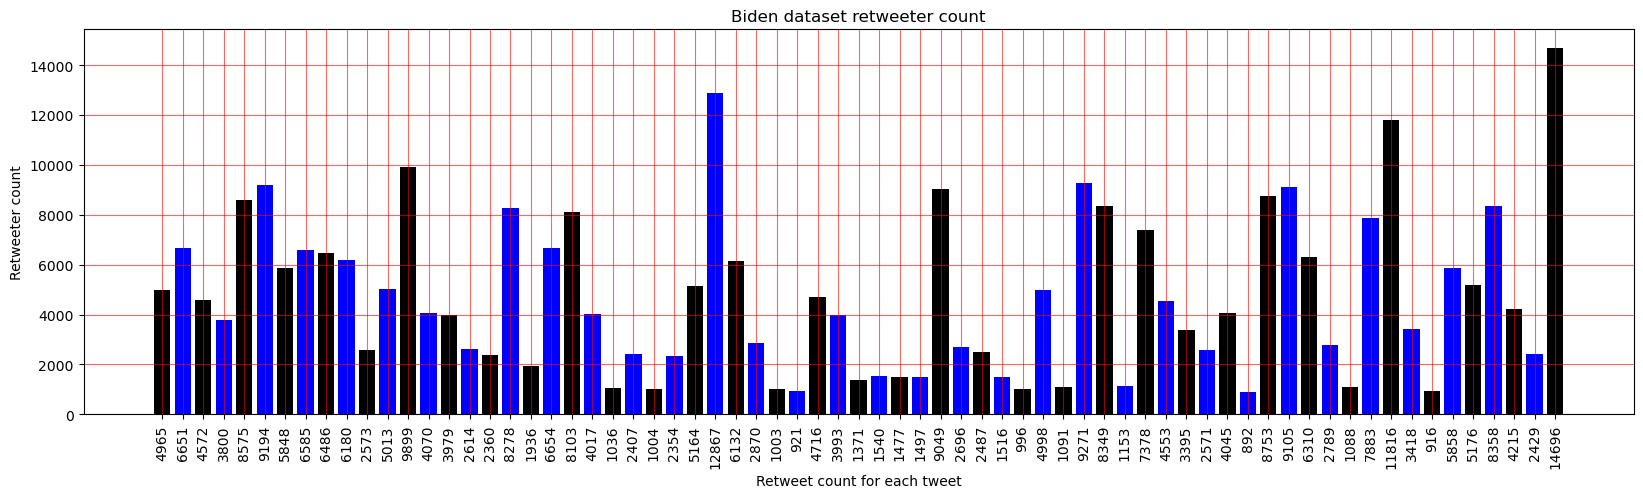

In [7]:
# retweet count for each tweet -- bar chart
count = list()
for id in retweeter_dict.keys():
    count.append(len(retweeter_dict[id]))
retweet_count = list(map(str, count))

plt.figure(figsize = (20,5))
plt.title('Biden dataset retweeter count')
plt.bar(retweet_count, count, color=['black', 'blue'], width=0.8, align='center')
plt.grid(True,color='r',alpha=0.6)
plt.xlabel('Retweet count for each tweet')
plt.ylabel('Retweeter count')
plt.xticks(rotation='vertical')
plt.show()

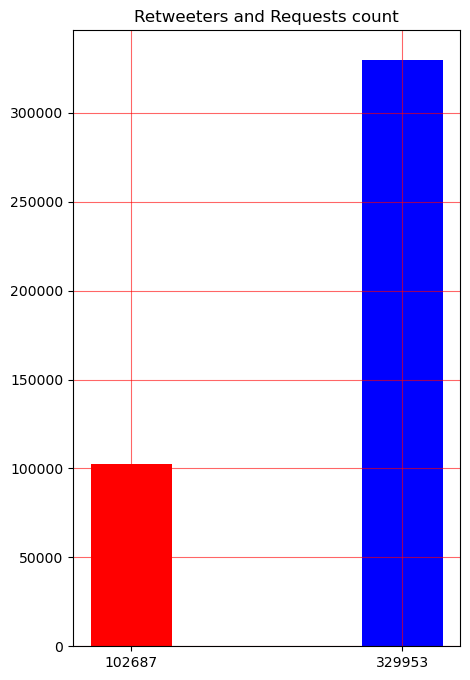

In [8]:
# Union the retweeter lists, filtering the repeated id

retweeters = set()
requests_count = 0
for i in retweeter_dict.keys():
    retweeter_list = set(retweeter_dict[i])
    requests_count += len(retweeter_list)
    retweeters |= retweeter_list # Union into retweeters

# And also, see the ratio of retweeters and requests count --> bar chart
plt.figure(figsize = (5,8))
plt.title('Retweeters and Requests count')
plt.bar([str(len(retweeters)), str(requests_count)], [len(retweeters), requests_count],color=['red', 'blue'], width=0.3, align='center')
plt.grid(True,color='r',alpha=0.6)
plt.show()

## Target User
- 踢掉 retweet 篇數過少的 users，剩下的對象就是 target users.
- 接著再用 target users 去蒐集相對應的 followers.
- Negative Sampling 可能要上.

In [9]:
# start finding retweets count of each user
user_retweet_count = dict()

if path.exists(file_path + "UserRetweetCount.json"):
    with open(file_path + "UserRetweetCount.json", "r") as f:
        user_retweet_count = json.load(f)

else:
    user_retweet_count = UserRetweetCount_MultiCore(
        retweeter_dict=retweeter_dict, 
        retweeters=list(retweeters), 
        parallelism=8, 
        requests_count=requests_count
    )
    with open(file_path + "UserRetweetCount.json", "w") as f:
        json.dump(user_retweet_count, f, indent=True)


In [10]:
# start statistics retweet count

"""
    Retweet count from 1 to len(how many tweets)
    show_list : first element represent 'how many users retweet 1 tweet', so are the rests.

"""
label = [str(i) for i in range(1,70,1)]
show_list = [0 for i in range(tweet_df.shape[0])]

for user in user_retweet_count.keys():
    index = user_retweet_count[user]
    show_list[index-1] += 1

Total users: 102687


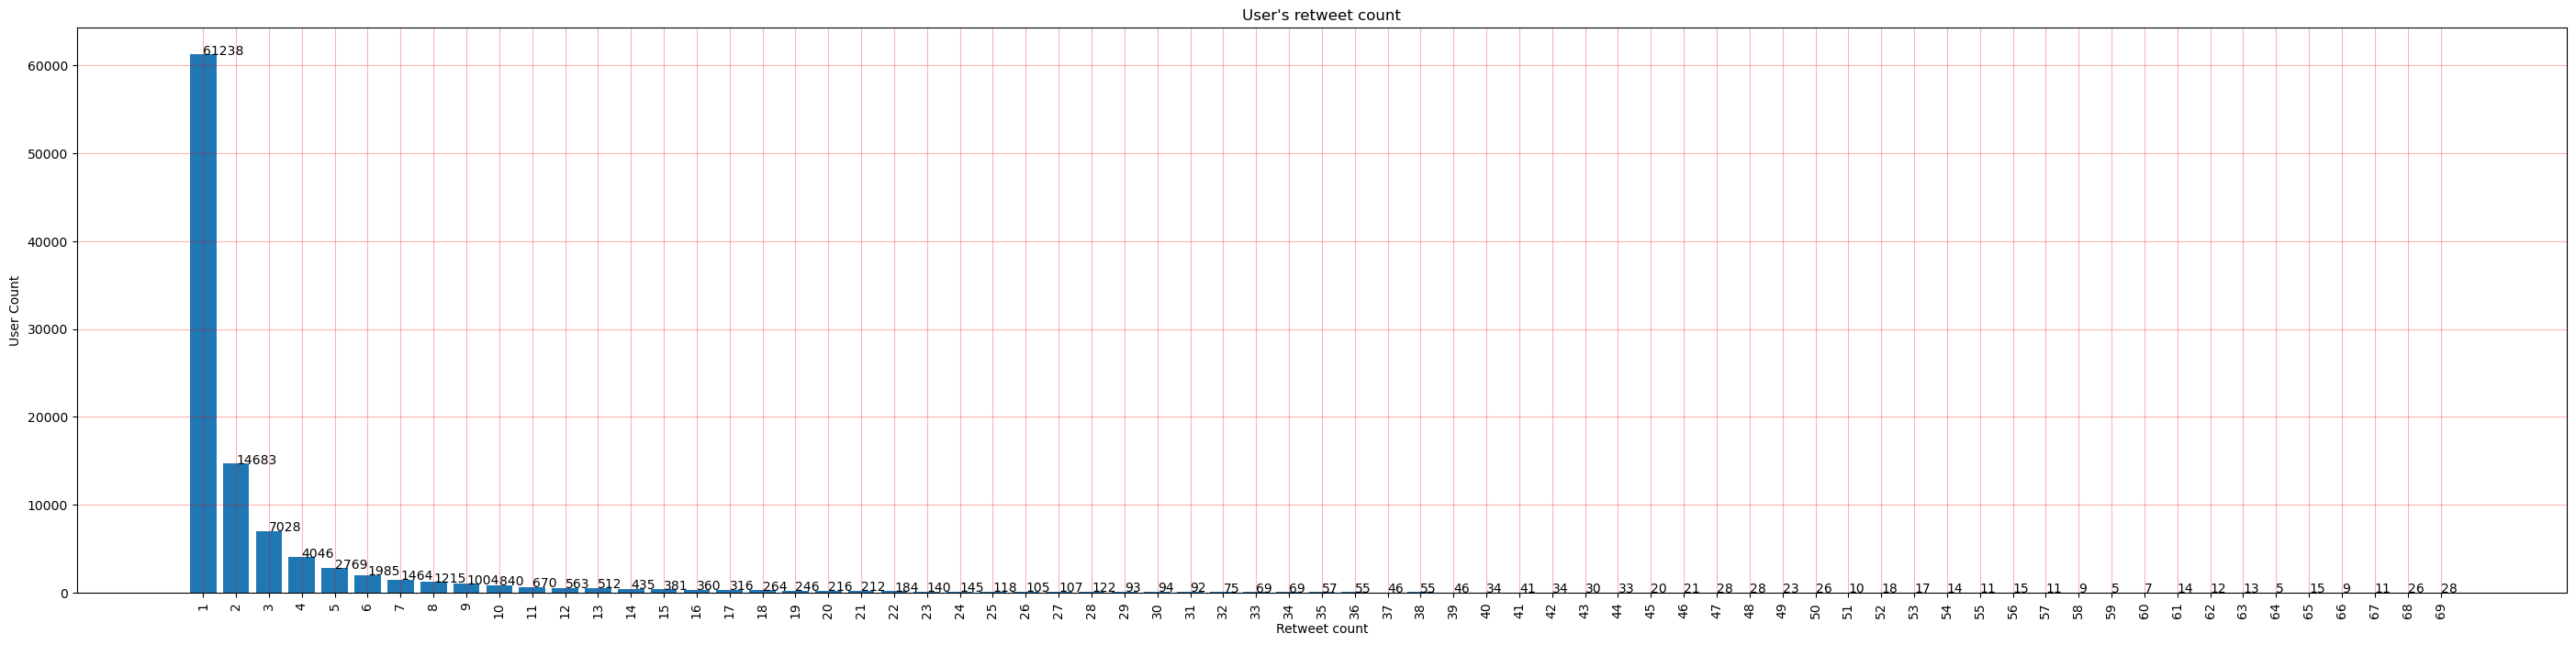

In [11]:
# Draw a bar plot to see
print("Total users: %d" % len(retweeters))
color = (0.3, 0.9, 0.4, 0.6)
plt.figure(figsize = (35,8))
plt.title("User's retweet count")
plt.bar(label, show_list)
plt.grid(True,color='r',alpha=0.3)
plt.xlabel('Retweet count')
plt.ylabel('User Count')
plt.xticks(rotation='vertical')
for index, value in enumerate(show_list):
    plt.text(index, value, str(value))
plt.show()

Total users : 102687
Deleting users of retweet counts lower than 5 : 89764
Total of target users : 12923


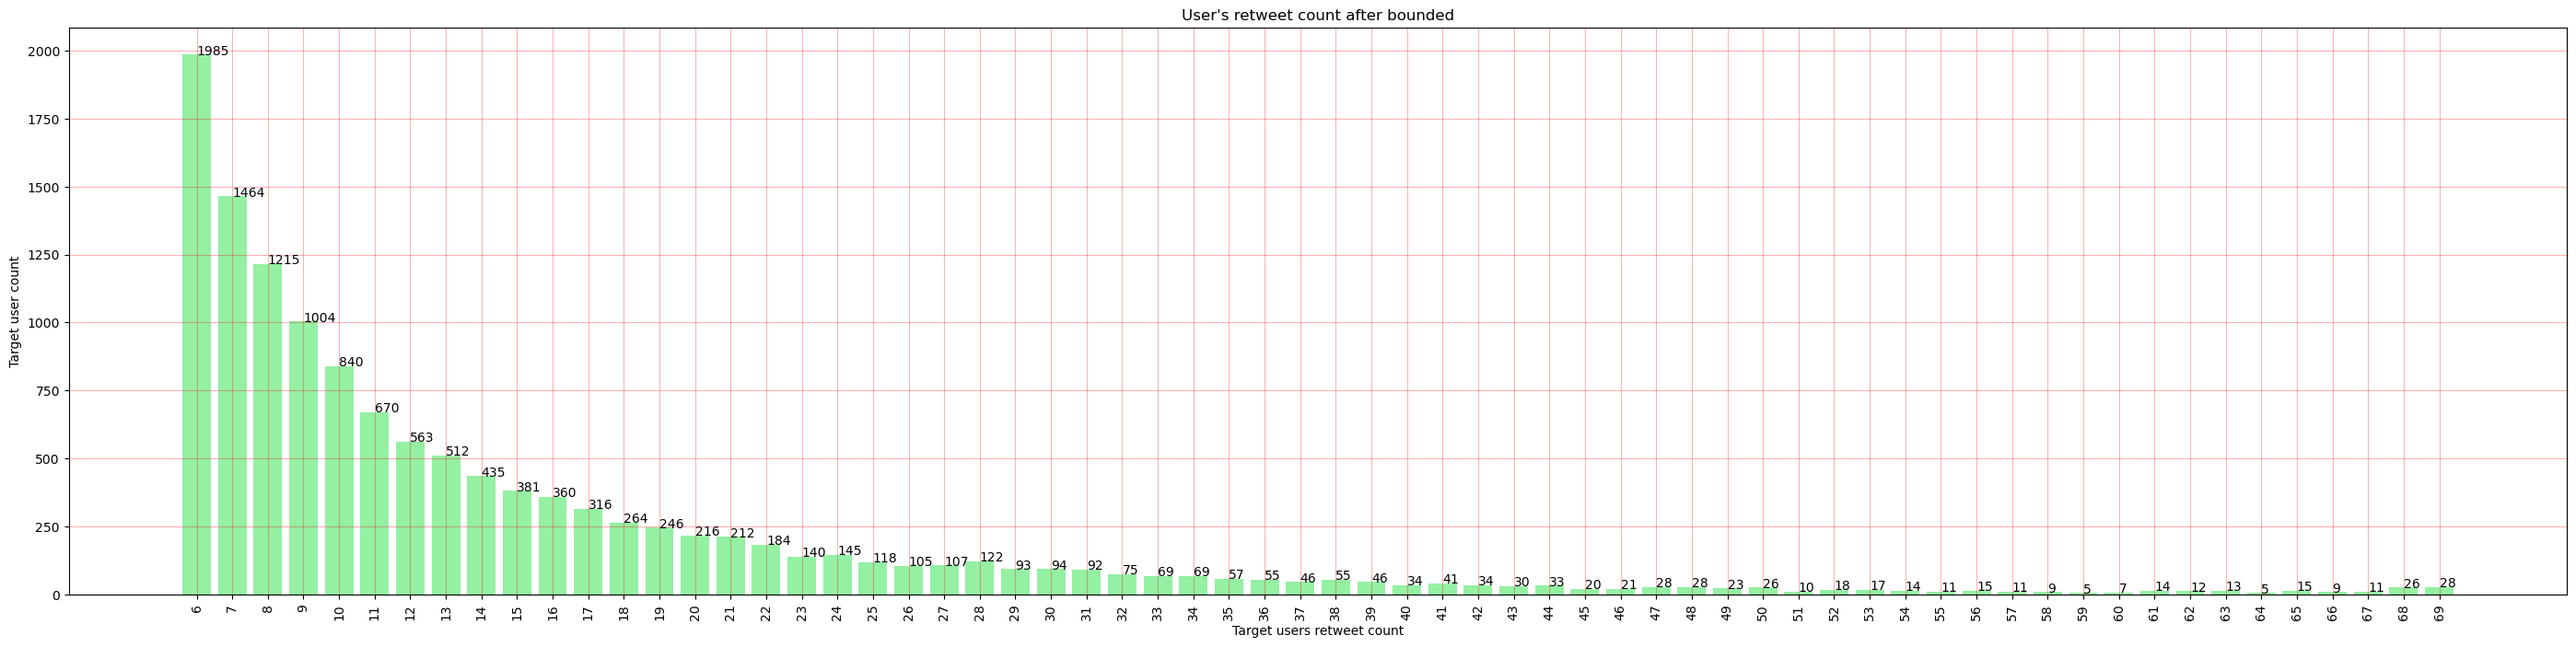

In [12]:
#   Draw a bar plot to see after bounded
"""
    Set bound after observing the user's retweet counts distributionns.
    Most of the users distributed in the range of 1 to 3.
"""


bound = 5
print("Total users :", len(retweeters))
print("Deleting users of retweet counts lower than %d : %d" % (bound, sum(show_list[0:bound])))
print("Total of target users : %d" % sum(show_list[bound:]))

color = (0.3, 0.9, 0.4, 0.6)
plt.figure(figsize = (35,8))
plt.title("User's retweet count after bounded")
plt.bar(label[bound:], show_list[bound:], color=color, width=0.8, align='center')
plt.grid(True,color='r',alpha=0.3)
plt.xlabel('Target users retweet count')
plt.ylabel('Target user count')
plt.xticks(rotation='vertical')
for index, value in enumerate(show_list[bound:]):
    plt.text(index, value, str(value))
plt.show()

In [13]:
wanna_find_target = False
target_users = list()

if path.exists(file_path + "target_users.json"):   # need to run the function to find target users
    with open(file_path + "target_users.json", "r") as f:
        json_file = json.load(f)
        target_users = list(json_file)

    
else: # load the file of target users
    target_users = FindTargetUser_MultiCore(
        bound = bound,
        retweeters = user_retweet_count,
    )
    target_users = sorted(target_users)
    print("Target users :", len(target_users))
    with open(file_path + "target_users.json", "w") as f:
        json.dump(target_users, f, indent=True)

### 將過濾非 target users 以後的貼文的轉推數以及他與 target users 的比例轉為 dataframe並畫圖表

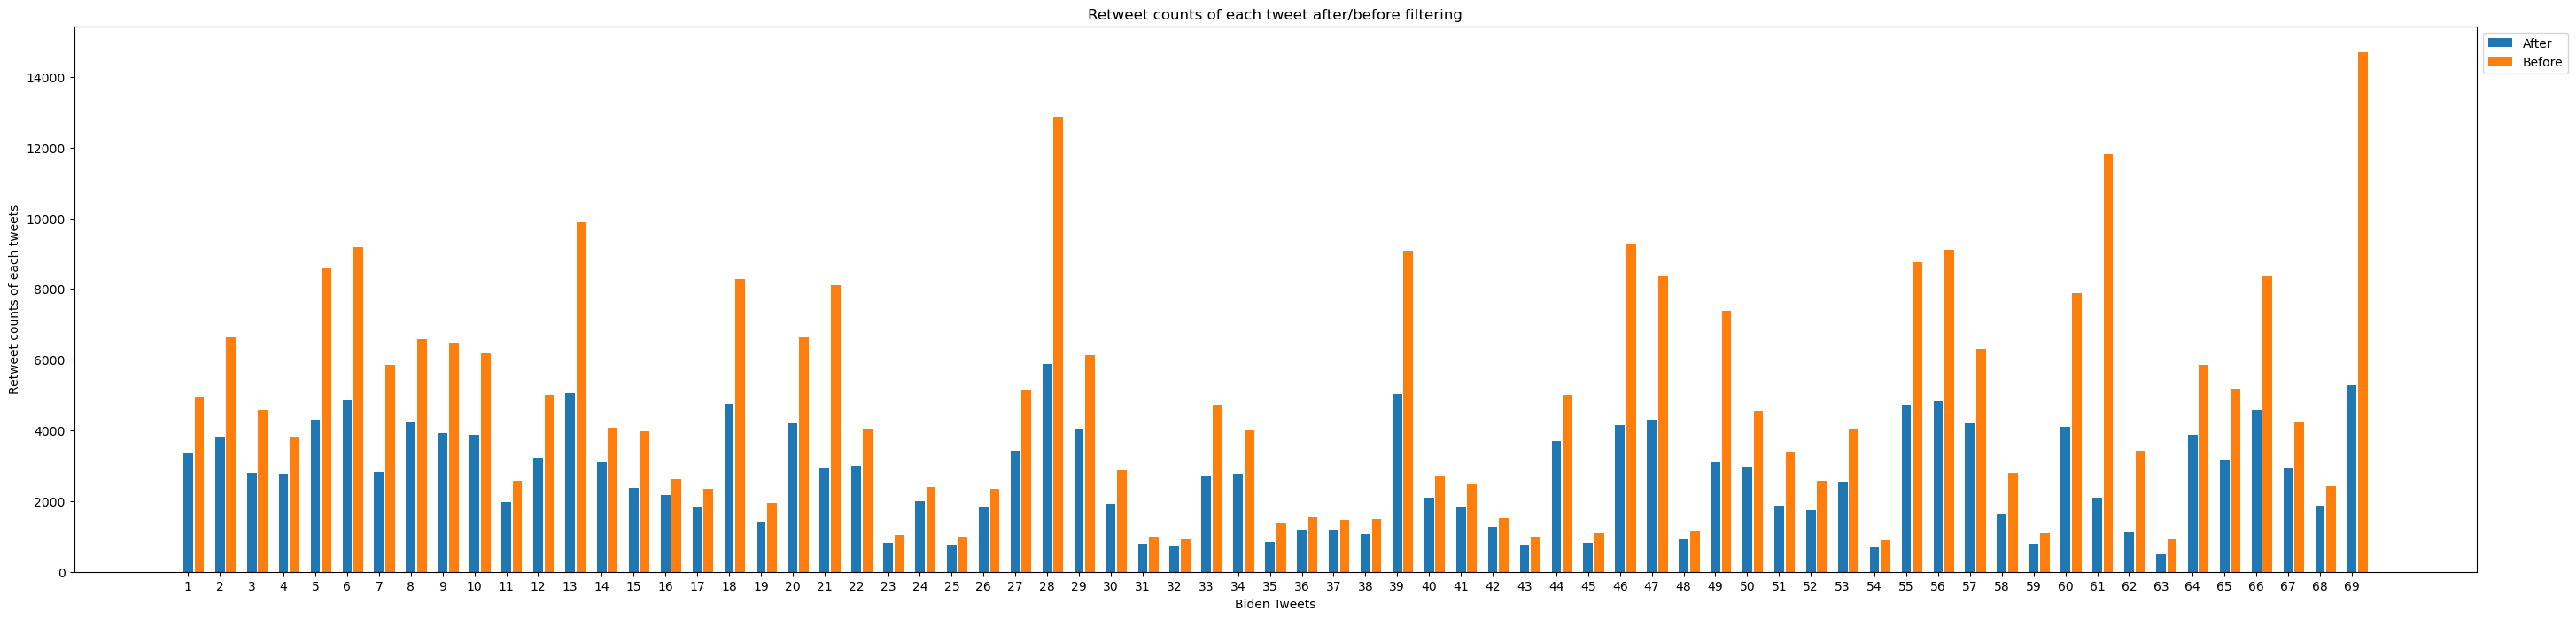

In [14]:
# retweet count for each tweet after filtering
count = [[], []]
tmp = dict()
for id in retweeter_dict.keys():
    tmp[id] = set(target_users) & set(retweeter_dict[id])
    count[0].append(len(tmp[id]))
    count[1].append(len(retweeter_dict[id]))
X = [str(i) for i in range(1, len(count[0])+1, 1)]
X_axis = np.arange(len(X))

plt.figure(figsize = (35,8))
plt.bar(X_axis, count[0], width=0.3,  label='After')
plt.bar(X_axis+0.35, count[1], width=0.3,  label='Before')
plt.xticks(X_axis, X)
plt.xlabel("Biden Tweets")
plt.ylabel("Retweet counts of each tweets")
plt.title("Retweet counts of each tweet after/before filtering")
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [15]:
ori = [len(retweeter_dict[i]) for i in retweeter_dict.keys()]
aft = [len(tmp[i]) for i in retweeter_dict.keys()]
df_data = {
    "id" : list(retweeter_dict.keys()),
    "Original retweet count" : count[1],
    "After filtering" : count[0]
}
my_df = pd.DataFrame(df_data)
#my_df['id'] = my_df[id].astype('str')
my_df['Ratio of after/total'] = my_df['After filtering'].div(len(retweeters)).round(3)
my_df.to_excel(file_path + "compare%d.xlsx" % bound, index=False, header=True, sheet_name="Threshold=%d" % bound)

## <font color="pink"> 開始針對 Day 11 ~ Day 17 的 Biden tweet 蒐集轉推的時間 </font> 

-  *把 dataG.xlsx 裡面的 tweet id 拿出來(biden_tweets)，送進 dataset.Get_User_Tweets_Multi()，原本 type 為 str，須轉換成 int*

-  *crawling target user 的貼文牆，若有轉推這段時間內的貼文，寫進 txt file（target id, referenced id, tweet id, created at）*

In [16]:
type(target_users[0])

int

In [17]:
file_path

'Biden/2022-11-07/'

In [18]:
biden_tweets = list()
with open(file_path + "user_tweets/dataG.xlsx", "r") as f:
    df = pd.read_excel(file_path + "user_tweets/dataG.xlsx")
    biden_tweets = list(df['id'].astype('int'))

print("Tweets for data graph:")
print("  * Tweets count :", len(biden_tweets))
print("  * Element type :", type(biden_tweets[0]))

Tweets for data graph:
  * Tweets count : 71
  * Element type : <class 'int'>


In [19]:
"""
    get user profile
    saved in 
"""
dataset.Get_User_Profile_Multi(
    target_user = target_users
)

Target users : 12923
Already crawled : 12923
Rest of : 0


In [20]:
"""
    get tweets from the post wall of each target user.
    and dont captured those target users who already been crawed.
"""

dataset.Get_User_Tweets_Multi(
    target_user=target_users,
    biden_tweets=biden_tweets
)


Already crawled : 12923
Target users : 12923
ALL data had already crawled !


In [21]:
# get follower list of every target users
remove_list = [ # followers too many
    9624742, 
    27493883, 
    2573480784, 
    307549658, 
    818893114979061761, 
    1351284403801108481, 
    713839291210792960,
    15115280
]
for i in remove_list:
    target_users.remove(i)

target_followers = dataset.Get_Followers_Multi(
    target_users = target_users
)
# followers 有抓到兩個大客戶，但是記得要踢掉，因為不好解釋。

Already crawled : 12917
Target users : 12915
Rest of: 0


## <font color="pink"> Graph Construction </font> 


1. *把所有 target user 的 id 一起 encoding 成 0, 1, 2, 3, ...*
   
2. *利用 1st ~ 7th 天有 retweet Biden 推文的關係當 edge，建立 Base Graph*

3. 利用 11th ~ 17th 天的 active/inactive 關係建出 $12 \times tweets$ 張的 data graph。<font color="orange"> *12 個時間點：6, 9, 12, 15, 18, 24, 30, 36, 42, 48, 54, 60 hr.*</font>

4. *Final prediction：72 hr 以後是否 retweet*


In [22]:
import numpy as np
import dgl
import torch
import networkx as nx

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Pytorch " + str(torch.__version__) + " computing by " + str(device))

Pytorch 1.12.1 computing by cuda:0


### <font color="pink"> Select Users For Graph Construction </font>

* $Retweeters := \text{users  who retweeted Biden's tweets from } 1^{st}\ to\ 7^{th}\ days.$

* $Vertex(target\_ users) := Retweeters \cap \text{\{Those users whose profile is not None\}.}$





In [24]:
# 因為 followers 比較難抓，因此抓的比較少，
# 所以建 graph 的 users 以『有抓到 follower list』且 『有 features』 的 users 為主

follower_files = os.listdir( file_path + 'followers/')
user_follow = set()
user_profile = list()

# follow list
for file in follower_files:
    with open( file_path + 'followers/' + file, 'r') as f:
        json_obj = json.load(f)
        user_follow.update(json_obj.keys())
for i in remove_list:
    if str(i) in user:
        user_follow.remove(str(i))
user_follow = list(user_follow)
user_follow = [int(i) for i in user_follow]
# user features
df = pd.read_excel(file_path + 'user_profile/Profile.xlsx')
df = df[df['followers_count'] != 'None']
df['id'] = df['id'].astype('str')
user_profile = list(df['id'])
user_profile = [int(i) for i in user_profile]
vertex = set(user_follow).intersection(set(user_profile))
vertex = list(vertex)
print("Vertex count :", len(vertex))


Vertex count : 7990


In [25]:

def ShowGraph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    graph = nx.Graph()
    graph.add_edges_from(edges)
    nx.draw(graph)
    plt.show()

def Vertex_Enconding(V:list): # V is vertex
    V = sorted(V)
    encoding_table = dict.fromkeys(V)
    count = 0
    for i in V:
        encoding_table[i] = count
        count += 1

    return encoding_table


def Encoding_Table_Reverse(encoding_table:dict):
    # Reverse key and values of encoding table
    ret = dict()
    for key in encoding_table:
        value = encoding_table[key]
        ret[value] = key
    return ret

### <font color="pink"> *User ID Encoding* </font>

In [26]:
encoding_table = Vertex_Enconding(vertex)
with open(file_path + 'Graph/encoding_table.json', 'w') as f: 
    json.dump(encoding_table, f)
print("Length of Encoding Table :", len(encoding_table))

Length of Encoding Table : 7990


### <font color="pink"> *Base Graph* </font>
1. $ \begin{equation} 
    \forall u, v \in V\ and\ u \neq v,\ (u,v) :=
    \begin{cases}
    \text{if u follow v or v follow u },1\\
    \text{else, }0
    \end{cases}
    \end{equation} $
2. *Tranform Base graph to Bidirected.*

In [27]:
baseG = dgl.graph(([], []), num_nodes = len(vertex))
baseG

Graph(num_nodes=7990, num_edges=0,
      ndata_schemes={}
      edata_schemes={})

In [28]:
# Vertex is a list storing ID of users

follower_list = dict()
for file in follower_files:
    follow_path = file_path + "followers/"
    with open(follow_path + file, "r") as f:
        json_data = json.load(f)
        follower_list.update(json_data)
#print("Lenth of Follower list :", len(follower_list))

zero_followers = 0
# Reverse Encoding
rev_table = Encoding_Table_Reverse(encoding_table = encoding_table)

for u in vertex:
    follow_list = follower_list[str(u)]
    follow_list = list( set(follow_list).intersection(vertex) )
    follow_list = [encoding_table[i] for i in follow_list]
    baseG.add_edges(encoding_table[u], follow_list)

In [29]:
# directed
baseG

Graph(num_nodes=7990, num_edges=308185,
      ndata_schemes={}
      edata_schemes={})

In [30]:
# transfer into undirected
baseG.adjacency_matrix().to_dense()
baseG = dgl.to_bidirected(baseG)
isolated = (baseG.in_degrees() == 0).nonzero()
baseG

Graph(num_nodes=7990, num_edges=416588,
      ndata_schemes={}
      edata_schemes={})

In [31]:
"Num Of Isolated Vertex :", len(isolated)

('Num Of Isolated Vertex :', 1354)

### <font color="pink"> *Isolated Vertex* </font>

1. *Selecting Top 10 degrees of Vertex from Base graph $ U:=\{u_1, ..., u_{10}\}$*
2. *for $v \in V_{isolated} :$*
   *    *$(v, Random(U)) := 1$*

In [32]:
print("Max Degree :", int(baseG.in_degrees().max()))
if len((baseG.in_degrees()==1).nonzero()):
    print("Min Degree (except isolated vertex) : 1")
print("Avg Degree :", float(baseG.in_degrees().sum()/len(baseG.nodes())))

Max Degree : 3520
Min Degree (except isolated vertex) : 1
Avg Degree : 52.138671875


In [33]:
import random

# find top 10 degrees
top10_deg = sorted(baseG.in_degrees(), reverse=True) 
top10_deg = top10_deg[0:10]
top10_deg = [i.item() for i in top10_deg]
top10_deg

[3520, 2073, 1863, 1830, 1807, 1804, 1777, 1761, 1689, 1656]

In [34]:
top_deg_nodes = [ (baseG.in_degrees() == degree).nonzero().item() for degree in top10_deg ] # find nodes by top degrees
top_deg_nodes

[6358, 2865, 1576, 4338, 1979, 7139, 3269, 1544, 1206, 4032]

In [35]:
for v in isolated:
    u = random.choice(top_deg_nodes)
    baseG.add_edges(v,u)
    #baseG.add_edges(u,v)
baseG = dgl.to_bidirected(baseG)

In [36]:
from dgl.data.utils import save_graphs

save_graphs(file_path + "/Graph/Base_Graph/baseG.bin", baseG)

## <font color="pink"> *User Feature* </font>

1. *Loading User_Profile.xlsx*
   
2. *Selecting rows by User ID according the users we build the base graph*
3. *Accroding their encoding number, put them into the corresponding Row (0,1,...,n-1)*
- ### *<font color="yellow">User Profile Location 需要再進行細分</font>*

In [38]:
user_profile = pd.read_excel(file_path + 'user_profile/Profile.xlsx')
user_profile

,id,location,followers_count,following_count,tweet_count,verified,created_at,class
0,56881451,None,0,56,103,False,2009-07-15 01:22:12+00:00,0
1,348399706,Saudi Arabia Hail Live,0,1583,106372,False,2011-08-04 11:02:11+00:00,-1
2,4771801823,None,0,68,2181,False,2016-01-11 06:50:46+00:00,0
3,1331361875800502016,None,0,214,9978,False,2020-11-24 22:20:02+00:00,0
4,1336815260775318016,Afghanistan,0,40,52,False,2020-12-09 23:29:41+00:00,-1
...,...,...,...,...,...,...,...,...
12556,818893114979061760,"New Jersey, USA",711195,4728,146783,False,2017-01-10 18:51:47+00:00,1
12557,307549658,"Miami, FL",812727,8999,81995,False,2011-05-29 20:59:40+00:00,1
12558,2573480784,"Philadelphia PA, Charleston SC",1156064,2602,250308,True,2014-06-17 20:09:43+00:00,1
12559,27493883,"New York, Florida",1168579,69056,368527,True,2009-03-29 20:12:52+00:00,1
